In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [194]:
gestures = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9
]
num_samples = 75
num_gestures = len(gestures)

one_hot = np.eye(len(gestures))

fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
formatdata = pd.DataFrame()
labels = []

for idx, gesture in enumerate(gestures):
    for i in range(1, num_samples+1):
        filepath = 'test_{0}_{1}.csv'.format(gesture, i)
        data = pd.read_csv(filepath, index_col=False)
        
        data['aX'] = (data['aX'] + 4*9.81) / (2*4*9.81)
        data['aY'] = (data['aY'] + 4*9.81) / (2*4*9.81)
        data['aZ'] = (data['aZ'] + 4*9.81) / (2*4*9.81)
        data['gX'] = (data['gX'] + 7.5) / (2*7.5)
        data['gY'] = (data['gY'] + 7.5) / (2*7.5)
        data['gZ'] = (data['gZ'] + 7.5) / (2*7.5)
        
        fulldata = fulldata.append(data)
        dataf = data.to_numpy().flatten().tolist()
        formatdata[idx*num_samples+i-1] = dataf
        label = one_hot[idx]
        labels.append(label)

formatdata = formatdata.transpose().to_numpy()
labels = np.array(labels)


In [237]:
127500/10/250

51.0

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(formatdata, labels, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85)


In [212]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2048, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(len(gestures), activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [214]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=25, # how many epochs to wait before stopping
    restore_best_weights=True,

)
history = model.fit(X_train, y_train, 
                    epochs=600,
                    batch_size=64,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))



Epoch 1/600
9/9 [==============================] - 1s 79ms/step - loss: 1.5361 - categorical_accuracy: 0.4447 - val_loss: 1.6698 - val_categorical_accuracy: 0.4425
Epoch 2/600
9/9 [==============================] - 1s 80ms/step - loss: 1.4636 - categorical_accuracy: 0.4714 - val_loss: 1.5822 - val_categorical_accuracy: 0.4513
Epoch 3/600
9/9 [==============================] - 1s 74ms/step - loss: 1.4179 - categorical_accuracy: 0.4981 - val_loss: 1.4998 - val_categorical_accuracy: 0.5221
Epoch 4/600
9/9 [==============================] - 1s 75ms/step - loss: 1.4054 - categorical_accuracy: 0.5248 - val_loss: 1.5765 - val_categorical_accuracy: 0.4513
Epoch 5/600
9/9 [==============================] - 1s 72ms/step - loss: 1.4256 - categorical_accuracy: 0.4962 - val_loss: 1.5480 - val_categorical_accuracy: 0.3894
Epoch 6/600
9/9 [==============================] - 1s 71ms/step - loss: 1.5171 - categorical_accuracy: 0.4561 - val_loss: 1.5827 - val_categorical_accuracy: 0.4425
Epoch 7/600
9/9 

Epoch 51/600
9/9 [==============================] - 1s 77ms/step - loss: 0.7418 - categorical_accuracy: 0.7385 - val_loss: 0.9691 - val_categorical_accuracy: 0.6903
Epoch 52/600
9/9 [==============================] - 1s 72ms/step - loss: 0.7628 - categorical_accuracy: 0.7405 - val_loss: 1.0754 - val_categorical_accuracy: 0.6726
Epoch 53/600
9/9 [==============================] - 1s 77ms/step - loss: 0.7634 - categorical_accuracy: 0.7176 - val_loss: 1.0360 - val_categorical_accuracy: 0.6903
Epoch 54/600
9/9 [==============================] - 1s 74ms/step - loss: 0.6961 - categorical_accuracy: 0.7767 - val_loss: 0.9528 - val_categorical_accuracy: 0.6460
Epoch 55/600
9/9 [==============================] - 1s 78ms/step - loss: 0.6950 - categorical_accuracy: 0.7595 - val_loss: 0.8863 - val_categorical_accuracy: 0.7345
Epoch 56/600
9/9 [==============================] - 1s 72ms/step - loss: 0.6647 - categorical_accuracy: 0.7729 - val_loss: 0.9350 - val_categorical_accuracy: 0.7257
Epoch 57/6

Epoch 101/600
9/9 [==============================] - 1s 77ms/step - loss: 0.4203 - categorical_accuracy: 0.8607 - val_loss: 0.6321 - val_categorical_accuracy: 0.7699
Epoch 102/600
9/9 [==============================] - 1s 88ms/step - loss: 0.3466 - categorical_accuracy: 0.8893 - val_loss: 0.7254 - val_categorical_accuracy: 0.7522
Epoch 103/600
9/9 [==============================] - 1s 85ms/step - loss: 0.4179 - categorical_accuracy: 0.8473 - val_loss: 0.7477 - val_categorical_accuracy: 0.7257
Epoch 104/600
9/9 [==============================] - 1s 85ms/step - loss: 0.4102 - categorical_accuracy: 0.8416 - val_loss: 0.7276 - val_categorical_accuracy: 0.7965
Epoch 105/600
9/9 [==============================] - 1s 77ms/step - loss: 0.4266 - categorical_accuracy: 0.8607 - val_loss: 0.8114 - val_categorical_accuracy: 0.7168
Epoch 106/600
9/9 [==============================] - 1s 92ms/step - loss: 0.4640 - categorical_accuracy: 0.8416 - val_loss: 0.6847 - val_categorical_accuracy: 0.7522
Epoc

9/9 [==============================] - 1s 94ms/step - loss: 0.2273 - categorical_accuracy: 0.9218 - val_loss: 0.6507 - val_categorical_accuracy: 0.8230
Epoch 151/600
9/9 [==============================] - 1s 86ms/step - loss: 0.2095 - categorical_accuracy: 0.9256 - val_loss: 0.6146 - val_categorical_accuracy: 0.7788
Epoch 152/600
9/9 [==============================] - 1s 81ms/step - loss: 0.2382 - categorical_accuracy: 0.9256 - val_loss: 0.8676 - val_categorical_accuracy: 0.7788
Epoch 153/600
9/9 [==============================] - 1s 83ms/step - loss: 0.2924 - categorical_accuracy: 0.8950 - val_loss: 0.7865 - val_categorical_accuracy: 0.7522
Epoch 154/600
9/9 [==============================] - 1s 79ms/step - loss: 0.3641 - categorical_accuracy: 0.8645 - val_loss: 0.9327 - val_categorical_accuracy: 0.7788
Epoch 155/600
9/9 [==============================] - 1s 83ms/step - loss: 0.3349 - categorical_accuracy: 0.8760 - val_loss: 0.8157 - val_categorical_accuracy: 0.7522
Epoch 156/600
9/9 

4/4 [==============================] - 0s 12ms/step - loss: 0.4924 - categorical_accuracy: 0.8761


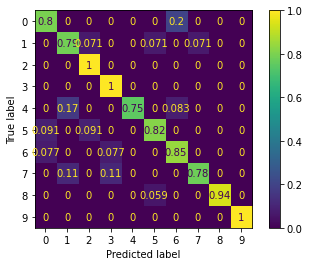

In [215]:
model.evaluate(X_test, y_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

prediction = np.round(model.predict(X_test), decimals=3)
prediction

prediction_lbl = np.argmax(prediction, axis=1)
test_lbl = np.where(y_test == 1)[1]

cm = confusion_matrix(test_lbl, prediction_lbl, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Try out different network sizes

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

hyperparameters = pd.DataFrame()

validation = []
for i in range(1,11):

    model = None
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(2048, activation='relu')) # relu is used for performance
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(len(gestures), activation='softmax'))
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

    early_stopping = callbacks.EarlyStopping(
        min_delta=0.0001, # minimium amount of change to count as an improvement
        patience=25, # how many epochs to wait before stopping
        restore_best_weights=True,
    )

    X_train, X_test, y_train, y_test = train_test_split(formatdata, labels, test_size=0.15)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85)

    history = model.fit(X_train, y_train, 
                        epochs=600,
                        batch_size=64,
                        callbacks=[early_stopping],
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    validation.append(model.evaluate(X_test, y_test))

np.average(validation, axis=0)


4/4 [==============================] - 0s 11ms/step - loss: 0.5973 - categorical_accuracy: 0.8407


array([0.52664173, 0.86814159])

## Hyperparameter Optimization

In [205]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units_1 = hp.Int('units', min_value=32, max_value=4096, step=32)
    hp_units_2 = hp.Int('units', min_value=32, max_value=4096, step=32)
    hp_units_3 = hp.Int('units', min_value=32, max_value=4096, step=32)
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu'))
    model.add(tf.keras.layers.Dense(units=hp_units_2, activation='relu'))
    model.add(tf.keras.layers.Dense(units=hp_units_3, activation='relu'))
    model.add(tf.keras.layers.Dense(len(gestures), activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_batch_size = hp.Int('batch_size', min_value = 16, max_value = 512, step = 16)

    model.compile(optimizer='adam',
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=[keras.metrics.CategoricalAccuracy()],
                batch_size=hp_batch_size)
    return model

In [206]:
tuner = kt.Hyperband(model_builder,
                     objective='val_categorical_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')


early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping

)


INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-205-d04094f64a23>", line 20, in model_builder
    model.compile(optimizer='adam',
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 555, in compile
    self._validate_compile(optimizer, metrics, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2717, in _validate_compile
    raise TypeError('Invalid keyword argument(s) in `compile`: %s' %
TypeError: Invalid keyword argument(s) in `compile`: {'batch_size'}


Invalid model 0/5


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-205-d04094f64a23>", line 20, in model_builder
    model.compile(optimizer='adam',
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 555, in compile
    self._validate_compile(optimizer, metrics, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2717, in _validate_compile
    raise TypeError('Invalid keyword argument(s) in `compile`: %s' %
TypeError: Invalid keyword argument(s) in `compile`: {'batch_size'}


Invalid model 1/5


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-205-d04094f64a23>", line 20, in model_builder
    model.compile(optimizer='adam',
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 555, in compile
    self._validate_compile(optimizer, metrics, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2717, in _validate_compile
    raise TypeError('Invalid keyword argument(s) in `compile`: %s' %
TypeError: Invalid keyword argument(s) in `compile`: {'batch_size'}
Traceback (most recent call last):


Invalid model 2/5


  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-205-d04094f64a23>", line 20, in model_builder
    model.compile(optimizer='adam',
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 555, in compile
    self._validate_compile(optimizer, metrics, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2717, in _validate_compile
    raise TypeError('Invalid keyword argument(s) in `compile`: %s' %
TypeError: Invalid keyword argument(s) in `compile`: {'batch_size'}
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-205-d04094f64a23>", line 20, in model_builder
    model.compile(optimizer='adam',
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\tr

Invalid model 3/5
Invalid model 4/5
Invalid model 5/5


RuntimeError: Too many failed attempts to build model.

In [204]:
tuner.search(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 29 Complete [00h 00m 07s]
val_categorical_accuracy: 0.08849557489156723

Best val_categorical_accuracy So Far: 0.20353981852531433
Total elapsed time: 00h 03m 31s

Search: Running Trial #30

Hyperparameter    |Value             |Best Value So Far 
units             |1696              |992               
batch_size        |64                |384               
tuner/epochs      |2                 |2                 
tuner/initial_e...|0                 |0                 
tuner/bracket     |4                 |4                 
tuner/round       |0                 |0                 

Epoch 1/2
17/17 [==============================] - 3s 104ms/step - loss: 3.0624 - categorical_accuracy: 0.0840 - val_loss: 2.3473 - val_categorical_accuracy: 0.1504
Epoch 2/2
 4/17 [======>.......................] - ETA: 1s - loss: 2.3459 - categorical_accuracy: 0.0703

KeyboardInterrupt: 

In [217]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

hyperparameters = pd.DataFrame()
for s1 in range(9,14):
    for s2 in range(9,14):
        for s3 in range(9,14):
            for n in range(4,10):
                validation = []
                for i in range(1,2):
                    model = None
                    model = tf.keras.Sequential()
                    model.add(tf.keras.layers.Dense(2**s1, activation='relu')) # relu is used for performance
                    model.add(tf.keras.layers.Dense(2**s2, activation='relu'))
                    model.add(tf.keras.layers.Dense(2**s3, activation='relu'))
                    model.add(tf.keras.layers.Dense(len(gestures), activation='softmax'))
                    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

                    early_stopping = callbacks.EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0001, # minimium amount of change to count as an improvement
                        patience=25, # how many epochs to wait before stopping
                        restore_best_weights=True,
                    )

                    X_train, X_test, y_train, y_test = train_test_split(formatdata, labels, test_size=0.15)
                    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85)

                    history = model.fit(X_train, y_train, 
                                      epochs=600,
                                      batch_size=2**n,
                                      callbacks=[early_stopping],
                                      validation_data=(X_val, y_val),
                                      verbose=0)

                    validation.append(model.evaluate(X_test, y_test))

                    indexing = '{0},{1},{2},bs={3}'.format(2**s1,2**s2,2**s3,2**n)
                    hyperparameters[indexing] = np.average(validation, axis=0)
                    print(hyperparameters)
    


4/4 [==============================] - 0s 5ms/step - loss: 0.4851 - categorical_accuracy: 0.8850
   512,512,512,bs=16
0           0.485143
1           0.884956


KeyboardInterrupt: 

In [275]:
hyperparameters

,16,32,64,128,256
0,0.620182,0.618816,0.490793,0.617349,0.640195
1,0.818182,0.822078,0.859740,0.824675,0.820779


## Train model on full data

In [96]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2048, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(len(gestures), activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=25, # how many epochs to wait before stopping
    restore_best_weights=True,
)

X_train, X_val, y_train, y_val = train_test_split(formatdata, labels, test_size=0.2)

history = model.fit(X_train, y_train, 
                    epochs=600,
                    batch_size=64,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val),
                    verbose=1)
